# Predição de Preços de Imóveis

Este projeto tem como objetivo prever os preços de Imóveis utilizando algoritmos de aprendizado de máquina. O conjunto de dados utilizado para este projeto foi coletado (scraped) do Vivareal: o foco deste trabalho é prever o preço de venda das casas utilizando Técnicas de Regressão. O conjunto de dados contém informações sobre casas em Goiânia, incluindo suas características e preços de venda. O projeto envolve pré-processamento de dados, engenharia de atributos (feature engineering), treinamento de modelos e avaliação. O objetivo é construir um modelo capaz de prever com precisão o preço de venda de uma casa com base em suas características.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import RFE

from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    KFold,
    cross_validate,
)
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv("dataset_houses.csv", sep=",", encoding="utf-8")

"O dataset apresenta valores atípicos (outliers) que devem ser tratados. Na coluna 'tipo_de_negócio', o conjunto de dados está categorizado em 'Venda' e 'Aluguel'. Iremos aplicar um filtro para selecionar apenas os registros de 'Venda', isolando assim todos os imóveis disponíveis para comercialização.


In [ ]:
df["is_house"] = df["titulo"].str.contains("Casa", case=False) | df[
    "descricao"
].str.contains("Casa", case=False)

df = df[df["is_house"]].copy()

In [13]:
df.shape

(3953, 25)

In [24]:
df

,titulo,endereco,descricao,preco,condominio,iptu,area,quartos,banheiros,suites,...,link,data_coleta,fonte,pagina_busca,id_imovel,data_criacao,dias_desde_criacao,bairro,regiao,is_house
0,"Casa com 3 Quartos e 2 banheiros à Venda, 95 m...","Rua 27 de Setembro, 1 - Setor Estrela Dalva, G...",CASA NO SETOR DALVA EM GOIÂNIA-GOIASSala e Coz...,299000,-1,-1,95,3,2,1,...,https://www.vivareal.com.br/imovel/casa-3-quar...,2025-06-20T03:52:33.779958,vivareal.com.br,pagina_0,2.772555e+09,20-01-2025,150,Setor Estrela Dalva,NOROESTE,True
1,"Casa com 2 Quartos e 2 banheiros à Venda, 63 m...","Rua 18 de Outubro, 9 - Setor Estrela Dalva, Go...",* 2Q. sendo 1 suíte* Sala de TV/Jantar* Cozinh...,284000,-1,-1,63,2,2,1,...,https://www.vivareal.com.br/imovel/casa-2-quar...,2025-06-20T03:52:41.667019,vivareal.com.br,pagina_0,2.814482e+09,16-06-2025,3,Setor Estrela Dalva,NOROESTE,True
2,"Casa com 3 Quartos e 2 banheiros à Venda, 138 ...","Rua ED5, 2 - Setor Estrela Dalva, Goiânia - GO",LINDA CASA LOCALIZADA NO SETOR ESTRELA DALVA.....,350000,-1,400,138,3,2,2,...,https://www.vivareal.com.br/imovel/casa-3-quar...,2025-06-20T03:52:49.778316,vivareal.com.br,pagina_0,2.814013e+09,13-06-2025,6,Setor Estrela Dalva,NOROESTE,True
3,"Casa com 2 Quartos e 1 banheiro à Venda, 64 m²...","Rua João Paulo, 0 - Setor Estrela Dalva, Goiân...",Fale direto com o captador:Daterra Imóveis - ...,280000,-1,-1,64,2,1,1,...,https://www.vivareal.com.br/imovel/casa-2-quar...,2025-06-20T03:52:58.436292,vivareal.com.br,pagina_0,2.812884e+09,10-06-2025,9,Setor Estrela Dalva,NOROESTE,True
4,"Casa com 2 Quartos e 2 banheiros à Venda, 62 m...","Rua 19 de Novembro, casa 02 - Setor Estrela Da...",CASA À VENDA NO ESTRELA DALVA – 2 QUARTOS (1 S...,220000,1,233,62,2,2,1,...,https://www.vivareal.com.br/imovel/casa-2-quar...,2025-06-20T03:53:07.610261,vivareal.com.br,pagina_0,2.811583e+09,05-06-2025,14,Setor Estrela Dalva,NOROESTE,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7582,"Casa com 2 Quartos e 2 banheiros à Venda, 86 m...","Rua ALV9, 1 - Setor Alto do Vale, Goiânia - GO","CASA NOVA À VENDA - SETOR ALTO DO VALE, GOIÂNI...",450000,-1,400,86,2,2,1,...,https://www.vivareal.com.br/imovel/casa-2-quar...,2025-06-20T21:02:21.701083,vivareal.com.br,pagina_308,2.754603e+09,06-11-2024,225,Alto do Vale,NOROESTE,True
7583,"Casa com 3 Quartos e 2 banheiros à Venda, 130 ...","Avenida Fonte Nova, 20 - Setor Alto do Vale, G...","Casa com 3/4, sendo 01 suíteClosetSala cozinha...",690000,-1,700,130,3,2,0,...,https://www.vivareal.com.br/imovel/casa-3-quar...,2025-06-20T21:02:27.441066,vivareal.com.br,pagina_308,2.749634e+09,16-10-2024,246,Alto do Vale,NOROESTE,True
7584,"Casa com 3 Quartos e 1 banheiro à Venda, 170 m...","Rua ALV16, 566 - Setor Alto do Vale, Goiânia - GO",Se você está procurando a casa dos seus sonh...,950000,-1,-1,170,3,1,1,...,https://www.vivareal.com.br/imovel/casa-3-quar...,2025-06-20T21:02:32.731244,vivareal.com.br,pagina_308,2.763216e+09,11-12-2024,190,Alto do Vale,NOROESTE,True
7586,"Casa com 3 Quartos e 1 banheiro à Venda, 130 m...","Rua RB 15, 01 - Setor Alto do Vale, Goiânia - GO","Casa com 3 quartos, sendo 1 suíte, closet, sal...",690000,-1,-1,130,3,1,1,...,https://www.vivareal.com.br/imovel/casa-3-quar...,2025-06-20T21:02:44.596166,vivareal.com.br,pagina_308,2.754562e+09,05-11-2024,226,Alto do Vale,NOROESTE,True


In [ ]:
df = df[
    (df["tipo_de_negocio"] == "Venda") & (df["preco"] > 0) & (df["area"] > 0)
].copy()

In [ ]:
print("Shape depois de filtrar Venda e preco > 0:", df.shape)

Shape depois de filtrar Venda e preco > 0: (3843, 25)


In [22]:
# Para os valores nulos o scraping tratou como -1, converter -1 para valores NaN

cols_neg_1 = [
    "preco",
    "condominio",
    "iptu",
    "area",
    "quartos",
    "banheiros",
    "suites",
    "andar",
    "vagas_de_estacionamento",
    "dias_desde_criacao",
]

for col in cols_neg_1:
    if col in df.columns:
        df[col] = df[col].replace(-1, np.nan)

df = df[~df["preco"].isna()].copy()

In [ ]:
# Considerando que Imovéis de locação, espaços, etc. Sao espaços que não existe quartos em sua descrição.
# Serão considerados imóveis não residenciais. Existe ainda a possibilidade de erro ao cadastrar o imóvel
# e não colocar a quantidade de quartos
# --- Remover imóveis não residenciais ---
df = df[df["quartos"].notna()].copy()

# Para ser considerado imóvel residêncial, deve existir pelo menos um quarto
df = df[df["quartos"] > 0].copy()

# --- Remover áreas irreais (erro de scraping) ---
# Área mínima realista para imóveis residenciais: ≥ 20 m²
# Área máxima realista: ≤ 1000 m²
df = df[df["area"].between(20, 1000)].copy()

# Para a construção do modelo, foi estabelecido algumas restrições.

In [28]:
df.shape

(3585, 25)

O foco é exclusivamente em imóveis À VENDA, então podemos ser ainda mais agressivos e eficientes na escolha das features, removendo o ruído do scraping.


In [31]:
# Removendo as coluans que não são relevantes para o modelo.
cols_to_drop = [
    "titulo",
    "endereco",
    "descricao",
    "link",
    "ofertante",
    "fonte",
    "pagina_busca",
    "id_imovel",
    "data_coleta",
    "data_cadastro",
    "data_criacao",
    "tipo_de_negocio",
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

print("Colunas após drop:", df.columns.tolist())

Colunas após drop: ['preco', 'condominio', 'iptu', 'area', 'quartos', 'banheiros', 'suites', 'andar', 'vagas_de_estacionamento', 'dias_desde_criacao', 'bairro', 'regiao', 'is_house']


In [34]:
df.columns

Index(['preco', 'condominio', 'iptu', 'area', 'quartos', 'banheiros', 'suites',
       'andar', 'vagas_de_estacionamento', 'dias_desde_criacao', 'bairro',
       'regiao', 'is_house'],
      dtype='object')

![boxplot](https://encrypted-tbn3.gstatic.com/licensed-image?q=tbn:ANd9GcRxEKWG-lXUjVTJz2P1wj7rw29jnK4Ifx5UbEbYl7YviCUrOvALY5LI0Yac83N_Pm3DORZAEsARjPWGbHNO7NQfwdkTwy93llZey86bl4IUbs3U0Zk)


Em estatística o padrão do Boxplot, usamos os quartis 0.25 (25%) e 0.75 (75%). Se usássemos o padrão em imóveis, o modelo consideraria qualquer casa de luxo como um "erro" (outlier) e a removeria. No código, alteramos os limites para 5% (0.05) e 95% (0.95), deixando os limites inferiores e superiores mais soft, removendo dados que são muito discrepantes como imóveis cadastrados por 1 Real ou 100.00 Reais ou imóveis cadastrados por R$ 999.999.999. Pegando os valores extremos,


Text(0, 0.5, 'Metros Quadrados (m²)')

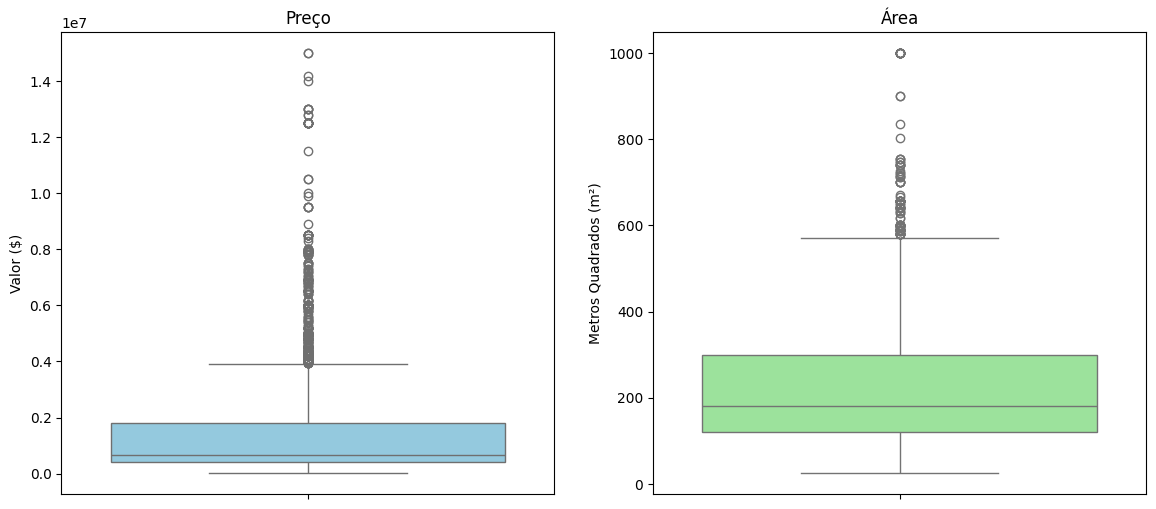

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Preço
sns.boxplot(y=df["preco"], ax=ax[0], color="skyblue")
ax[0].set_title("Preço")
ax[0].set_ylabel("Valor ($)")

# Plot Área
sns.boxplot(y=df["area"], ax=ax[1], color="lightgreen")
ax[1].set_title("Área")
ax[1].set_ylabel("Metros Quadrados (m²)")

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = max(lower_bound, 0)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df = remove_outliers(df, "preco")
df = remove_outliers(df, "area")

In [43]:
print(f"Shape após remoção de outliers: {df.shape}")

Shape após remoção de outliers: (3564, 13)


In [46]:
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
preco                         0
condominio                 2326
iptu                       1957
area                          0
quartos                       0
banheiros                     0
suites                        0
andar                      3286
vagas_de_estacionamento       0
dias_desde_criacao            0
bairro                        0
regiao                        0
is_house                      0
dtype: int64


In [ ]:
cols_custos = ["condominio", "iptu"]

df[cols_custos] = df[cols_custos].fillna(0)

df.isna().sum()

preco                         0
condominio                    0
iptu                          0
area                          0
quartos                       0
banheiros                     0
suites                        0
andar                      3286
vagas_de_estacionamento       0
dias_desde_criacao            0
bairro                        0
regiao                        0
is_house                      0
dtype: int64

In [ ]:
# Feature engineering

# df["tem_condominio"] = df["condominio"].notna().astype(int)
# df["tem_iptu"] = df["iptu"].notna().astype(int)


# df["tem_andar"] = df["andar"].notna().astype(int)

# df["andar_preenchido"] = df["andar"].fillna(0)

In [ ]:
# Como temos muitos valores nulos, optei por remover a coluna andar e considerar somente se existe ou não andar.
# Para avaliar melhor seria segmentar somente apartamentos e verificar se o andar influência no preço do imóvel.

df = df.drop("andar", axis=1)

Text(0.5, 1.0, 'Área vs Quartos')

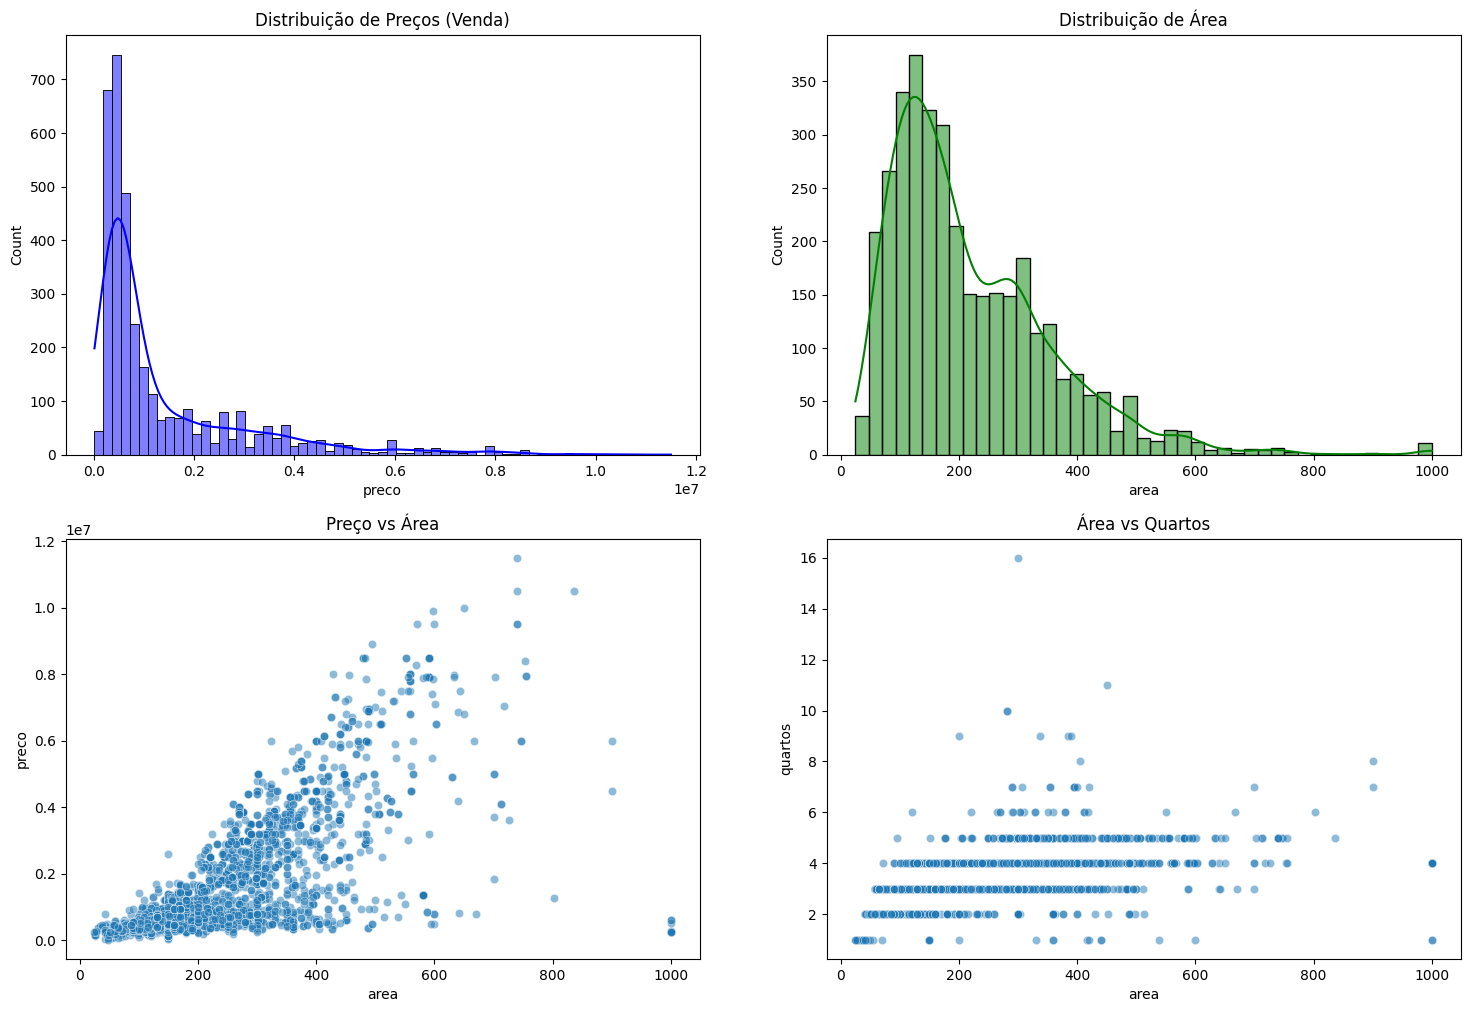

In [ ]:
# Visualizações EDA
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Dist do Preço
sns.histplot(df["preco"], kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribuição de Preços (Venda)")

# Dist da Área
sns.histplot(df["area"], kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Distribuição de Área")

# Scatter Preço x Área
sns.scatterplot(data=df, x="area", y="preco", alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Preço vs Área")

# Preço por Bairro (Top 10)
sns.scatterplot(data=df, x="area", y="quartos", alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Área vs Quartos")

In [61]:
df = df[df["quartos"] < 10]

In [141]:
df.shape

(3560, 13)

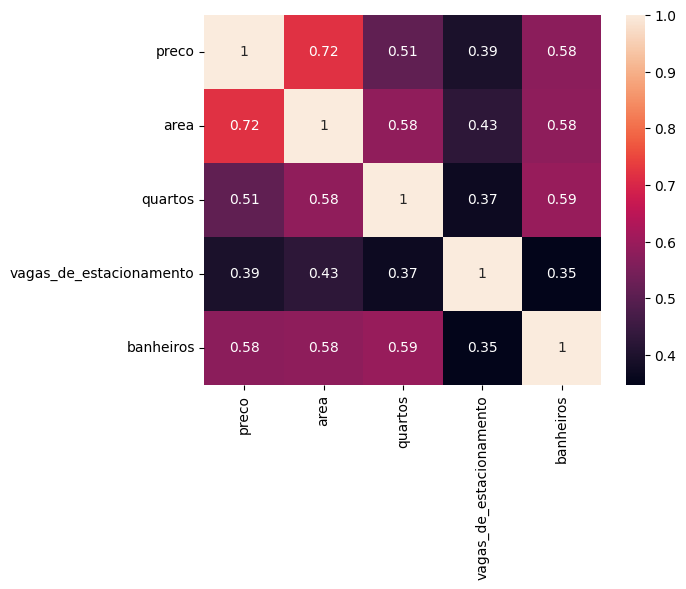

In [64]:
corr = df[
    [
        "preco",
        "area",
        "quartos",
        "vagas_de_estacionamento",
        "banheiros",
    ]
].corr()
sns.heatmap(corr, annot=True)
plt.show()

# Modelos


## Funções


In [ ]:
def plotar_learningcurve(modelo, X, y, cv=5, scoring="neg_mean_squared_error"):
    train_sizes, train_scores, test_scores = learning_curve(
        modelo,
        X,
        y,
        cv=5,
        scoring="neg_mean_squared_error",
        train_sizes=np.linspace(0.1, 1.0, 20),
    )

    # train_sizes - quantidade de dados de treinamento
    # train_scores - erro de treinamento
    # test_scores - erro de validação
    # scoring="neg_mean_squared_error" - erro negativo de mse (padrão do sklearn)
    # train_sizes=np.linspace(0.1, 1.0, 20) - quantidade de dados de treinamento (de 10% a 100% com 20 passos) Isso cria um array com 20 valores igualmente espaçados entre 0.1 e 1.0 (incluindo ambos os extremos).
    # cv=5 - quantidade de folds

    # Convertendo erros negativos para valores positivos de MSE
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    # Plotando as curvas de aprendizado
    plt.figure(figsize=(10, 6))
    plt.plot(
        train_sizes,
        train_scores_mean,
        label="Erro de treinamento",
        color="blue",
        marker="o",
    )
    plt.plot(
        train_sizes,
        test_scores_mean,
        label="Erro de validação",
        color="green",
        marker="o",
    )
    plt.title("Curva de Aprendizado")
    plt.xlabel("Tamanho do conjunto de Treinamento")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [70]:
def validacao_cruzada(modelo, X, y, cv=5):
    # Iniciando o K-fold com embaralhamento
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    # n_splits=cv - quantidade de folds
    # shuffle=True - embaralhar os dados
    # random_state=42 - seed para reprodutibilidade

    # Configurando nossas métricas
    scoring = {"mse": make_scorer(mean_squared_error), "r2": make_scorer(r2_score)}

    # Realizando validação cruzada e obtendo métricas
    metricas = cross_validate(
        modelo, X, y, cv=kf, scoring=scoring, return_train_score=True
    )

    # Exibindo métricas
    print("Métricas de treinamento:")
    print(
        "Mean Squared Error (MSE):",
        f"{metricas['train_mse'].mean():.4f} ± {metricas['train_mse'].std():.4f}",
    )
    print(
        "R2 Score:",
        f"{metricas['train_r2'].mean():.4f} ± {metricas['train_r2'].std():.4f}",
    )

    print("Métricas de teste:")
    print(
        "Mean Squared Error (MSE):",
        f"{metricas['test_mse'].mean():.4f} ± {metricas['test_mse'].std():.4f}",
    )
    print(
        "R2 Score:",
        f"{metricas['test_r2'].mean():.4f} ± {metricas['test_r2'].std():.4f}",
    )

# Pipeline


In [159]:
df.columns

Index(['preco', 'condominio', 'iptu', 'area', 'quartos', 'banheiros', 'suites',
       'vagas_de_estacionamento', 'dias_desde_criacao', 'bairro', 'regiao',
       'is_house', 'tem_andar'],
      dtype='object')

In [162]:
df

,preco,condominio,iptu,area,quartos,banheiros,suites,vagas_de_estacionamento,dias_desde_criacao,bairro,regiao,is_house,tem_andar
0,299000,0.0,0.0,95,3.0,2.0,1,2,150.0,Setor Estrela Dalva,NOROESTE,True,0
1,284000,0.0,0.0,63,2.0,2.0,1,1,3.0,Setor Estrela Dalva,NOROESTE,True,1
2,350000,0.0,400.0,138,3.0,2.0,2,3,6.0,Setor Estrela Dalva,NOROESTE,True,0
3,280000,0.0,0.0,64,2.0,1.0,1,1,9.0,Setor Estrela Dalva,NOROESTE,True,0
4,220000,1.0,233.0,62,2.0,2.0,1,2,14.0,Setor Estrela Dalva,NOROESTE,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7582,450000,0.0,400.0,86,2.0,2.0,1,2,225.0,Alto do Vale,NOROESTE,True,0
7583,690000,0.0,700.0,130,3.0,2.0,0,2,246.0,Alto do Vale,NOROESTE,True,0
7584,950000,0.0,0.0,170,3.0,1.0,1,2,190.0,Alto do Vale,NOROESTE,True,0
7586,690000,0.0,0.0,130,3.0,1.0,1,2,226.0,Alto do Vale,NOROESTE,True,0


In [ ]:
features_total = [
    "condominio",
    "iptu",
    "area",
    "quartos",
    "banheiros",
    "suites",
    "vagas_de_estacionamento",
]

features_cat = ["bairro", "regiao"]

features_negocio = [
    "quartos",
    "banheiros",
    "suites",
    "vagas_de_estacionamento",
]

In [ ]:
# Regressão linear (Primeira Tentativa)

X = df[features_negocio].copy()
y = df["preco"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

print("r2 - treino", r2_score(y_train, reg_linear.predict(X_train)))
print("r2 - teste", r2_score(y_test, reg_linear.predict(X_test)))

r2 - treino 0.5488593251421005
r2 - teste 0.5291457613574108


In [79]:
X = df[features_total]
y = df["preco"]

reg_linear = LinearRegression()
selector = RFE(reg_linear, n_features_to_select=5)
# RFE (Recursive Feature Elimination) - Eliminação Recursiva de Features
# Treina a Regressão Linear com todas as 16 features
# Remove a feature com menor importância
# Retreina com 15 features
# Repete até restar apenas 5 features (n_features_to_select=5)
selector.fit(X, y)

print("Features selecionadas:", X.columns[selector.support_])
print("Features não selecionadas:", X.columns[~selector.support_])

Features selecionadas: Index(['quartos', 'banheiros', 'suites', 'tem_andar',
       'vagas_de_estacionamento'],
      dtype='object')
Features não selecionadas: Index(['condominio', 'iptu', 'area', 'dias_desde_criacao'], dtype='object')


In [82]:
# Regressão Linear com Validação Cruzada (Segunda Tentativa)

X = df[X.columns[selector.support_]]
print("Colunas selecionadas:", X.columns)

# X é a minha variável independente (features) e y é a variável dependente (target)

reg_linear = LinearRegression()

validacao_cruzada(reg_linear, X, y, cv=5)

Colunas selecionadas: Index(['quartos', 'banheiros', 'suites', 'tem_andar',
       'vagas_de_estacionamento'],
      dtype='object')
Métricas de treinamento:
Mean Squared Error (MSE): 1203290883974.6851 ± 33039007104.4719
R2 Score: 0.5459 ± 0.0057
Métricas de teste:
Mean Squared Error (MSE): 1211726171308.8240 ± 130386173466.4806
R2 Score: 0.5387 ± 0.0255


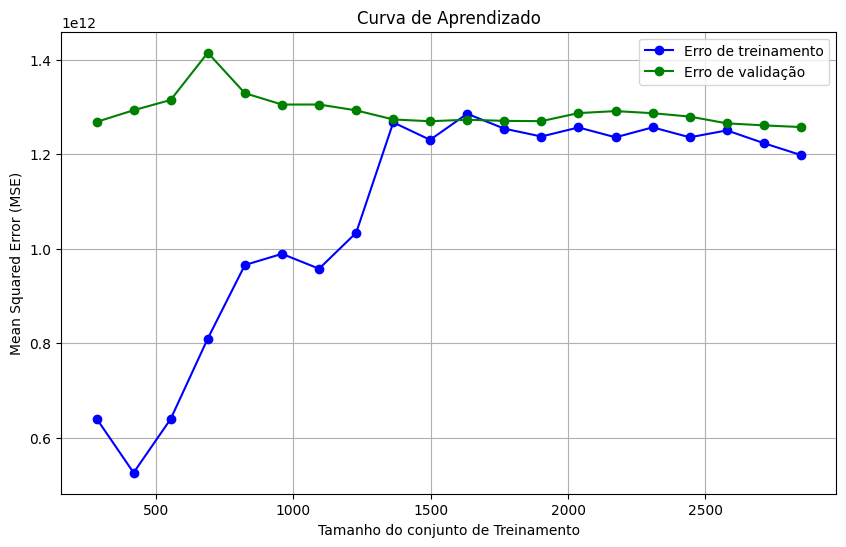

In [85]:
plotar_learningcurve(reg_linear, X, y, cv=5, scoring="r2")

In [ ]:
# Regressão polinomial ([grau 2] 3 Tentativa)

X = df[features_negocio]
y = df["preco"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg_quadrada = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
reg_quadrada.fit(X_train, y_train)

print("r2 - treino", r2_score(y_train, reg_quadrada.predict(X_train)))
print("r2 - teste", r2_score(y_test, reg_quadrada.predict(X_test)))

r2 - treino 0.6153212033922457
r2 - teste 0.5649348820207312


In [91]:
# Regressão polinomial (grau 2, validação cruzada)
reg_quadrada = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
validacao_cruzada(reg_quadrada, X, y, cv=5)

Métricas de treinamento:
Mean Squared Error (MSE): 1036496809723.1455 ± 32754974294.5487
R2 Score: 0.6089 ± 0.0058
Métricas de teste:
Mean Squared Error (MSE): 1075468898884.1338 ± 119952762303.2951
R2 Score: 0.5906 ± 0.0260


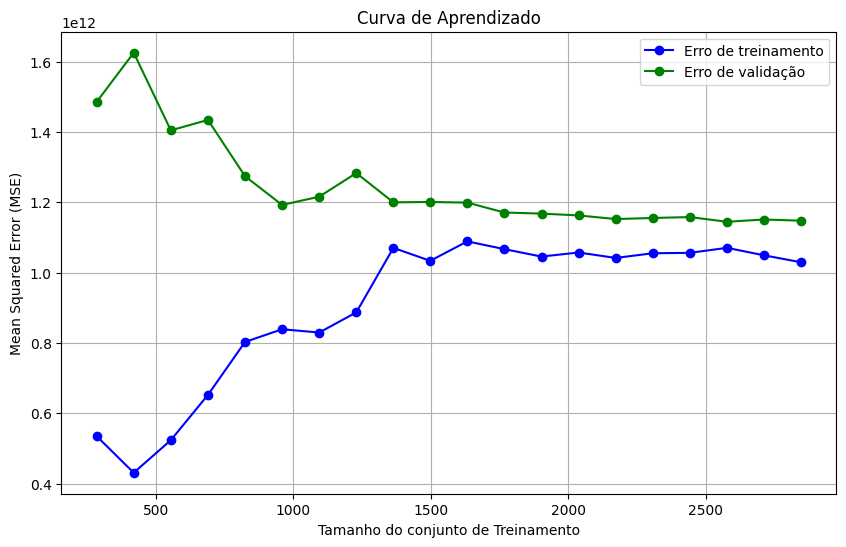

In [94]:
plotar_learningcurve(reg_quadrada, X, y, cv=5, scoring="r2")

In [109]:
col = df[features_total]
print(col.columns)

Index(['condominio', 'iptu', 'area', 'quartos', 'banheiros', 'suites',
       'tem_andar', 'vagas_de_estacionamento', 'dias_desde_criacao'],
      dtype='object')


In [ ]:
X = df[features_total]
y = df["preco"]


reg_square_pipe = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2)),
        ("rfe", RFE(LinearRegression(), n_features_to_select=5)),
        ("regressor", LinearRegression()),
    ]
)

reg_square_pipe.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('rfe',
                 RFE(estimator=LinearRegression(), n_features_to_select=5)),
                ('regressor', LinearRegression())])

In [142]:
# Gerar nomes das features polinomias
poly_features = reg_square_pipe.named_steps["poly"]
print("Poly features:", poly_features)
feature_names = poly_features.get_feature_names_out()
# print("Feature names:", feature_names)

print("===" * 10)
# Features escolhidas pelo RFE
rfe = reg_square_pipe.named_steps["rfe"]
selected_features = feature_names[rfe.support_]

print("Features selecionadas pelo RFE")
for k, v in enumerate(selected_features):
    print(k, v)

Poly features: PolynomialFeatures()
Features selecionadas pelo RFE
0 quartos
1 suites
2 tem_andar
3 quartos tem_andar
4 suites^2


In [145]:
binary_cols = [col for col in df.columns if set(df[col].unique()) == {0, 1}]
for col in binary_cols:
    print(col, df[col].unique())

tem_andar [0 1]


In [151]:
# testar polinomial com features selecionadas no linear
X = df[["quartos", "suites"]]

reg_quadrada = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
validacao_cruzada(reg_quadrada, X, y, cv=5)

Métricas de treinamento:
Mean Squared Error (MSE): 1099803968284.0513 ± 30025693585.2844
R2 Score: 0.5849 ± 0.0062
Métricas de teste:
Mean Squared Error (MSE): 1108656939213.3687 ± 118129689726.3877
R2 Score: 0.5774 ± 0.0298


In [160]:
from sklearn.tree import DecisionTreeRegressor

In [154]:
# Começando com dados de negócio (features)
X = df[features_negocio]
y = df["preco"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [163]:
reg_dtr = DecisionTreeRegressor(max_depth=7)
validacao_cruzada(reg_dtr, X, y, cv=5)


Métricas de treinamento:
Mean Squared Error (MSE): 669160247997.4623 ± 12775593856.3633
R2 Score: 0.7473 ± 0.0062
Métricas de teste:
Mean Squared Error (MSE): 926995666378.0325 ± 83901406055.0843
R2 Score: 0.6456 ± 0.0306


In [166]:
# usar todas as features
X = df[features_total]
y = df["preco"]

reg_dtr = DecisionTreeRegressor(max_depth=3)
validacao_cruzada(reg_dtr, X, y, cv=5)

Métricas de treinamento:
Mean Squared Error (MSE): 612551535965.1023 ± 5117179967.8922
R2 Score: 0.7685 ± 0.0100
Métricas de teste:
Mean Squared Error (MSE): 658456212582.1201 ± 35598568342.7140
R2 Score: 0.7462 ± 0.0346


In [169]:
# Selecionando features
reg_dtr = DecisionTreeRegressor(max_depth=7)
selector = RFE(reg_dtr, n_features_to_select=5)

In [172]:
selector.fit(X, y)

RFE(estimator=DecisionTreeRegressor(max_depth=7), n_features_to_select=5)

In [175]:
selected_features = X.columns[selector.support_]
print("Features selecionadas pelo RFE", selected_features)

Features selecionadas pelo RFE Index(['condominio', 'area', 'banheiros', 'suites', 'dias_desde_criacao'], dtype='object')


In [181]:
X = df[selected_features]
y = df["preco"]

reg_dtr = DecisionTreeRegressor(max_depth=7)
validacao_cruzada(reg_dtr, X, y, cv=5)

Métricas de treinamento:
Mean Squared Error (MSE): 260094916965.2021 ± 18518158519.6942
R2 Score: 0.9017 ± 0.0082
Métricas de teste:
Mean Squared Error (MSE): 504331649587.3550 ± 64688756171.7763
R2 Score: 0.8038 ± 0.0426


In [184]:
# Vamos ajustar os hiperparâmetros com gridsearch
from sklearn.model_selection import GridSearchCV

In [187]:
parametros = {
    "max_depth": [3, 5, 7, 9],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

reg_dtr = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(
    reg_dtr, parametros, cv=5, scoring="r2", return_train_score=True
)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='r2')

In [190]:
print("Melhor configuração de hiperparâmetros:", grid_search.best_params_)

Melhor configuração de hiperparâmetros: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [193]:
reg_dtr = DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=2)
validacao_cruzada(reg_dtr, X, y, cv=5)

Métricas de treinamento:
Mean Squared Error (MSE): 268284623141.3654 ± 18920344413.8016
R2 Score: 0.8987 ± 0.0078
Métricas de teste:
Mean Squared Error (MSE): 496494199868.8065 ± 91111937058.3142
R2 Score: 0.8088 ± 0.0389


In [ ]:
plotar_learningcurve(reg_dtr, X, y, cv=5, scoring="r2")

In [196]:
df_grid = pd.DataFrame(grid_search.cv_results_)
df_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003616,0.000499,0.001381,0.000151,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.667616,0.802368,...,0.679771,0.086726,28,0.782291,0.741021,0.78703,0.784629,0.770962,0.773186,0.017
1,0.003015,0.000479,0.001016,0.000208,3,1,5,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.667616,0.802368,...,0.679771,0.086726,28,0.782291,0.741021,0.78703,0.784629,0.770962,0.773186,0.017
2,0.002698,0.000005,0.000920,0.000019,3,1,10,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.667616,0.802368,...,0.679771,0.086726,28,0.782291,0.741021,0.78703,0.784629,0.770962,0.773186,0.017
3,0.003039,0.000456,0.001013,0.000084,3,2,2,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.667616,0.802368,...,0.679771,0.086726,28,0.782291,0.741021,0.78703,0.784629,0.770962,0.773186,0.017
4,0.003743,0.000157,0.001248,0.000181,3,2,5,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.667616,0.802368,...,0.679771,0.086726,28,0.782291,0.741021,0.78703,0.784629,0.770962,0.773186,0.017


In [199]:
df_grid = df_grid[["params", "mean_train_score", "mean_test_score"]].copy()
df_grid["dif_score"] = df_grid["mean_train_score"] - df_grid["mean_test_score"]

In [202]:
df_grid[df_grid["dif_score"] < 0.1]

,params,mean_train_score,mean_test_score,dif_score
0,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.773186,0.679771,0.093416
1,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.773186,0.679771,0.093416
2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.773186,0.679771,0.093416
3,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.773186,0.679771,0.093416
4,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.773186,0.679771,0.093416
5,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.773186,0.679771,0.093416
6,"{'max_depth': 3, 'min_samples_leaf': 4, 'min_s...",0.773186,0.679771,0.093416
7,"{'max_depth': 3, 'min_samples_leaf': 4, 'min_s...",0.773186,0.679771,0.093416
8,"{'max_depth': 3, 'min_samples_leaf': 4, 'min_s...",0.773186,0.679771,0.093416


In [208]:
from sklearn.ensemble import RandomForestRegressor

In [205]:
X = df[selected_features]  # estou usando a seleção anterior (melhore isso)
X.columns

Index(['condominio', 'area', 'banheiros', 'suites', 'dias_desde_criacao'], dtype='object')

In [211]:
reg_rfr = RandomForestRegressor(n_estimators=100, random_state=42)
validacao_cruzada(reg_rfr, X, y, cv=5)

Métricas de treinamento:
Mean Squared Error (MSE): 50433944327.3963 ± 1974889435.9668
R2 Score: 0.9809 ± 0.0012
Métricas de teste:
Mean Squared Error (MSE): 351618739625.6158 ± 62087194364.8065
R2 Score: 0.8625 ± 0.0356


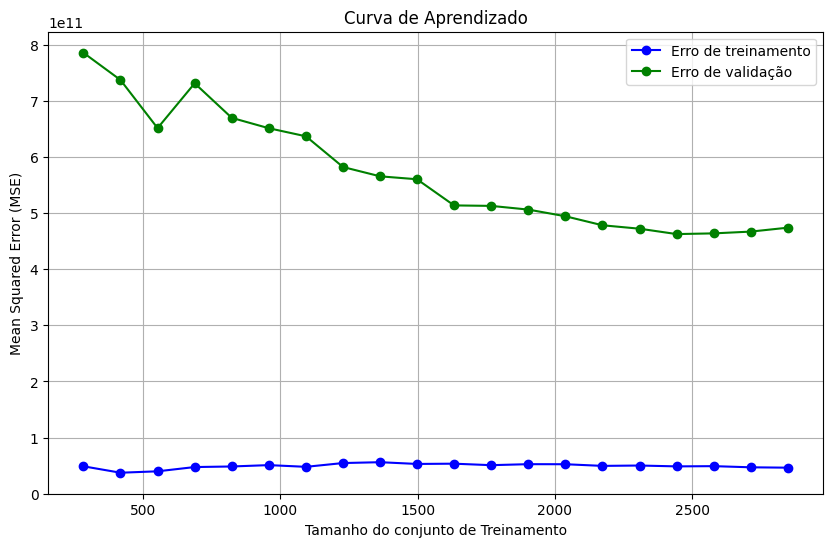

In [214]:
plotar_learningcurve(reg_rfr, X, y, cv=5)

In [217]:
parametros = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

reg_rfr = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    reg_rfr, parametros, cv=5, scoring="r2", return_train_score=True
)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='r2')

In [220]:
print("Melhor configuração de hiperparâmetros:", grid_search.best_params_)

Melhor configuração de hiperparâmetros: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [223]:
reg_rfr = RandomForestRegressor(
    max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100
)
validacao_cruzada(reg_rfr, X, y, cv=5)

Métricas de treinamento:
Mean Squared Error (MSE): 265268242657.3669 ± 9559890976.7758
R2 Score: 0.8997 ± 0.0061
Métricas de teste:
Mean Squared Error (MSE): 429494475046.7534 ± 65789992269.0376
R2 Score: 0.8330 ± 0.0373


In [226]:
df_grid = pd.DataFrame(grid_search.cv_results_)
df_grid = df_grid[["params", "mean_train_score", "mean_test_score"]].copy()
df_grid["dif_score"] = df_grid["mean_train_score"] - df_grid["mean_test_score"]

In [229]:
df_grid[df_grid["dif_score"] < 0.05]

,params,mean_train_score,mean_test_score,dif_score


In [232]:
df_grid.sort_values(by="dif_score", ascending=False)

,params,mean_train_score,mean_test_score,dif_score
57,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.911743,0.787156,0.124586
54,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.914861,0.791052,0.123809
63,"{'max_depth': 7, 'min_samples_leaf': 2, 'min_s...",0.910687,0.787908,0.122779
56,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.916241,0.793740,0.122501
58,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.912309,0.790191,0.122118
...,...,...,...,...
20,"{'max_depth': 3, 'min_samples_leaf': 4, 'min_s...",0.801890,0.718213,0.083677
23,"{'max_depth': 3, 'min_samples_leaf': 4, 'min_s...",0.801890,0.718213,0.083677
24,"{'max_depth': 3, 'min_samples_leaf': 4, 'min_s...",0.801535,0.717972,0.083563
18,"{'max_depth': 3, 'min_samples_leaf': 4, 'min_s...",0.801535,0.717972,0.083563


In [235]:
from sklearn.ensemble import GradientBoostingRegressor

In [238]:
reg_gbr = GradientBoostingRegressor(
    learning_rate=0.1,
    n_estimators=50,
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
)
validacao_cruzada(reg_gbr, X, y, cv=5)


Métricas de treinamento:
Mean Squared Error (MSE): 429640426298.8008 ± 15124493671.8197
R2 Score: 0.8377 ± 0.0088
Métricas de teste:
Mean Squared Error (MSE): 499531654729.1590 ± 30918078984.7879
R2 Score: 0.8068 ± 0.0304


In [244]:
!pip install xgboost
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 11.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [247]:
from xgboost import XGBRegressor

In [250]:
reg_xbr = XGBRegressor(learning_rate=0.1, n_estimators=50, max_depth=2, random_state=42)

validacao_cruzada(reg_xbr, X, y, cv=5)

Métricas de treinamento:
Mean Squared Error (MSE): 438913738834.3306 ± 12090324955.4843
R2 Score: 0.8342 ± 0.0079
Métricas de teste:
Mean Squared Error (MSE): 502479539734.7444 ± 24646876269.9665
R2 Score: 0.8056 ± 0.0307


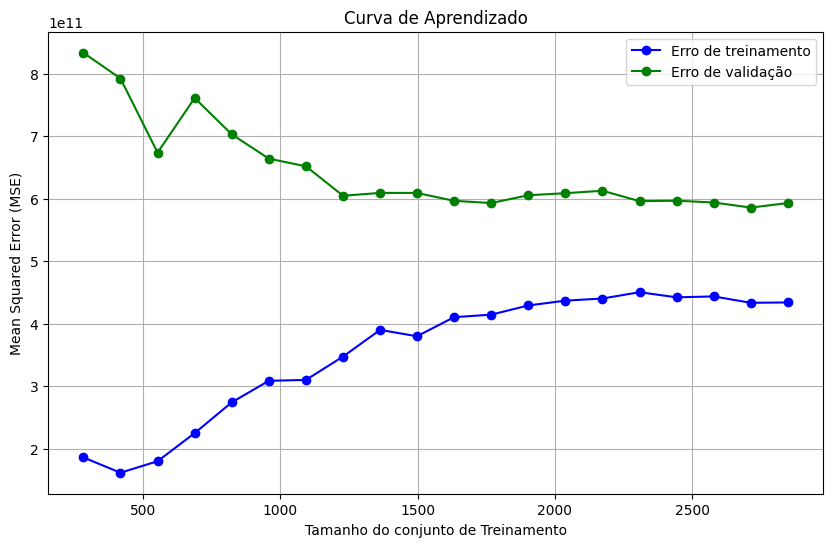

In [253]:
plotar_learningcurve(reg_xbr, X, y, cv=5)

In [256]:
# Modelo baseline com features_total
X_gbr_base = df[features_total]
gbr_baseline = GradientBoostingRegressor(random_state=42)
validacao_cruzada(gbr_baseline, X_gbr_base, y, cv=5)

Métricas de treinamento:
Mean Squared Error (MSE): 269530783555.5469 ± 9579511399.7559
R2 Score: 0.8982 ± 0.0051
Métricas de teste:
Mean Squared Error (MSE): 402068688599.4697 ± 38240267369.6925
R2 Score: 0.8430 ± 0.0354


In [259]:
# Seleção de features com RFE
selector_gbr = RFE(GradientBoostingRegressor(random_state=42), n_features_to_select=8)
selector_gbr.fit(X_gbr_base, y)

# Features selecionadas
features_gbr = X_gbr_base.columns[selector_gbr.support_]
print("Features selecionadas pelo RFE para GradientBoosting:")
for i, feature in enumerate(features_gbr):
    print(f"{i + 1}. {feature}")

Features selecionadas pelo RFE para GradientBoosting:
1. condominio
2. iptu
3. area
4. quartos
5. banheiros
6. suites
7. vagas_de_estacionamento
8. dias_desde_criacao


In [262]:
# Validação cruzada com features selecionadas
X_gbr = df[features_gbr]
validacao_cruzada(gbr_baseline, X_gbr, y, cv=5)

Métricas de treinamento:
Mean Squared Error (MSE): 269532863466.6125 ± 9465934733.5104
R2 Score: 0.8982 ± 0.0047
Métricas de teste:
Mean Squared Error (MSE): 403467194989.6362 ± 35616289785.3320
R2 Score: 0.8425 ± 0.0347


In [265]:
parametros_gbr = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
}

grid_search_gbr = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    parametros_gbr,
    cv=5,
    scoring="r2",
    return_train_score=True,
)
grid_search_gbr.fit(X_gbr, y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='r2')

In [270]:
print("Melhores hiperparâmetros para GradientBoosting:", grid_search_gbr.best_params_)

Melhores hiperparâmetros para GradientBoosting: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}


In [267]:
# Validação cruzada com melhor modelo
best_gbr = grid_search_gbr.best_estimator_
validacao_cruzada(best_gbr, X_gbr, y, cv=5)

Métricas de treinamento:
Mean Squared Error (MSE): 29495510266.6783 ± 1630884781.2829
R2 Score: 0.9888 ± 0.0009
Métricas de teste:
Mean Squared Error (MSE): 318483937778.6862 ± 61606956403.7845
R2 Score: 0.8729 ± 0.0459


In [273]:
# Analisando resultados do Grid Search
df_gbr_grid = pd.DataFrame(grid_search_gbr.cv_results_)
df_gbr_grid = df_gbr_grid[["params", "mean_train_score", "mean_test_score"]].copy()
df_gbr_grid["dif_score"] = (
    df_gbr_grid["mean_train_score"] - df_gbr_grid["mean_test_score"]
)
df_gbr_grid.sort_values(by="mean_test_score", ascending=False).head(10)

,params,mean_train_score,mean_test_score,dif_score
71,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.989197,0.824111,0.165086
68,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.991387,0.822654,0.168732
67,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.978906,0.821092,0.157814
41,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa...",0.978755,0.820700,0.158055
70,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.976520,0.820579,0.155941
50,"{'learning_rate': 0.1, 'max_depth': 7, 'min_sa...",0.996140,0.819293,0.176847
49,"{'learning_rate': 0.1, 'max_depth': 7, 'min_sa...",0.989319,0.818963,0.170356
48,"{'learning_rate': 0.1, 'max_depth': 7, 'min_sa...",0.978107,0.818954,0.159153
44,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa...",0.975128,0.817983,0.157145
64,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.980649,0.815991,0.164658


In [ ]:
best_gbr_dif_score = df_gbr_grid[df_gbr_grid["dif_score"] < 0.05]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=befac4e2-0744-4270-b574-19d8a12713c4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>
